<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Harmonic_Oscillator_Before_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


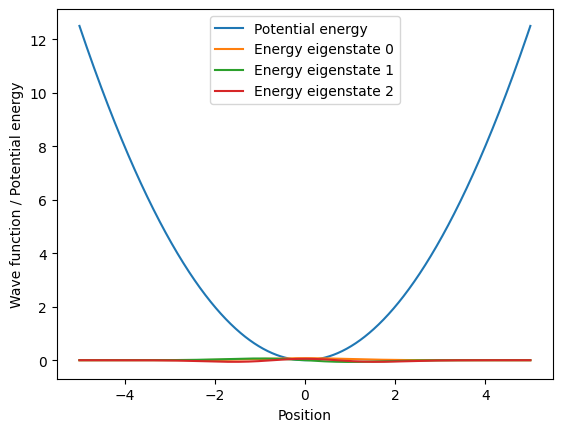

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the potential function
omega = 1.0  # oscillator frequency
def potential(x):
    return 0.5*omega**2*x**2

# Set up the grid
N = 1000
L = 5
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

# Define the Hamiltonian operator
def hamiltonian(psi):
    # Kinetic energy term
    psi_shifted_right = np.roll(psi, -1)
    psi_shifted_left = np.roll(psi, 1)
    kinetic_energy = -0.5*(psi_shifted_right + psi_shifted_left - 2*psi)/dx**2
    # Potential energy term
    potential_energy = potential(x)*psi
    # Total energy
    energy = kinetic_energy + potential_energy
    return energy

# Find the energy eigenvalues and eigenfunctions using the finite difference method
H = -0.5*(np.roll(np.eye(N), -1, axis=0) + np.roll(np.eye(N), 1, axis=0) - 2*np.eye(N))/dx**2 + np.diag(potential(x))
energies, wave_functions = np.linalg.eigh(H)

# Plot the first few energy eigenstates and the potential energy
plt.plot(x, potential(x), label='Potential energy')
for i in range(3):
    plt.plot(x, wave_functions[:, i], label='Energy eigenstate %d' % i)
plt.xlabel('Position')
plt.ylabel('Wave function / Potential energy')
plt.legend()
plt.show()
